In [1]:
!pip install -Uqq fastai
!pip install timm
from fastai.vision.all import *
import timm

In [2]:
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

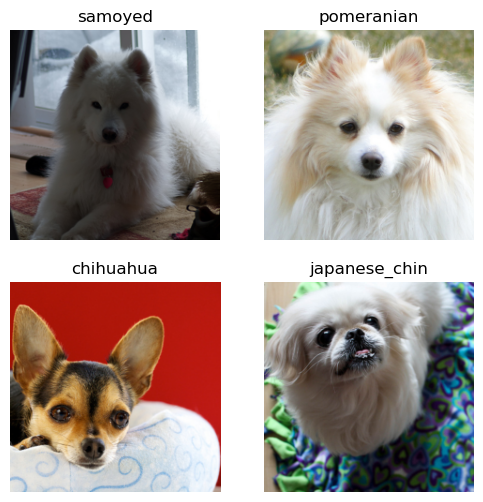

In [3]:
dls.show_batch(max_n=4)

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/bashaardhoot/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|████████████████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:25<00:00, 3.38MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.471680,0.302299,0.102842,02:13


epoch,train_loss,valid_loss,error_rate,time
0,0.425701,0.347507,0.106901,05:48
1,0.283796,0.253488,0.076455,03:58
2,0.136061,0.220120,0.069689,02:58


In [5]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [7]:
learn.export('model.pkl')